<a href="https://colab.research.google.com/github/stellavirginiaa/College-Life-Team-Task/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
import glob
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
def glcm_homogen(thres_img):
  # Hitung matriks GLCM
  glcm = greycomatrix(thres_img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
  # Hitung fitur GLCM
  homogeneity = greycoprops(glcm, 'homogeneity').mean()
  return homogeneity

def glcm_contrast(thres_img):
  # Hitung matriks GLCM
  glcm = greycomatrix(thres_img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
  # Hitung fitur GLCM
  contrast = greycoprops(glcm, 'contrast').mean()
  return contrast

def glcm_energy(thres_img):
  # Hitung matriks GLCM
  glcm = greycomatrix(thres_img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
  # Hitung fitur GLCM
  energy = greycoprops(glcm, 'energy').mean()
  return energy


def threshold(jenis_gambar):
  im = cv2.imread(jenis_gambar)
  thresh_value = 200
  max_value = 255
  thresh , img_thresh = cv2.threshold(im ,thresh_value , max_value  , cv2.THRESH_BINARY)
  gray_img = cv2.cvtColor(img_thresh, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray_img)

  return gray_img
  

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

kontras [1733.7209868772475, 519.2569014363162, 1455.9109659752173, 576.8842434021478, 117.00109165591556, 546.4438953118048, 280.5803863818734, 2744.505368431555, 238.8377176872064, 125.54153260090109, 825.1832935240832, 198.54696213462879, 664.390581911001, 170.07260616136068, 3421.1993426260387, 660.4715665413783, 220.87446799488202, 2079.5638781324096, 407.86615851109804, 256.89916118061876, 166.8851244677786, 269.7466324774966, 206.13523595649997, 55.279975546717964, 931.3278842891445, 427.7484529554016, 362.77062326802564, 892.5294917625706, 1320.275857537373, 724.0214783198537, 273.60248780478037, 745.9418499674819, 530.128613493423, 772.681076469892, 88.90899484149398, 416.49168954085314, 405.94308392022424, 1284.721070411948, 2244.618398307442, 139.85593754304307, 508.80281799640227, 61.31364981868928, 523.8609242189685, 210.20818174550857, 197.9036194146355, 1256.5126325884612, 141.61461381636713, 148.99138379286148]
homogen [0.9102909741084675, 0.9732463897144872, 0.92122240

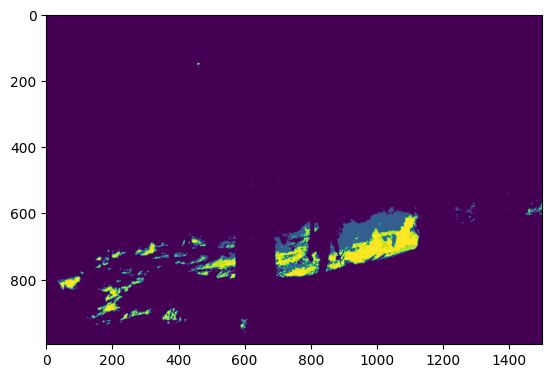

In [ ]:
contrastF = []
homogenF = []
energyF = []
for image in glob.glob(r"//content/drive/MyDrive/ai/fire_detection/fire_images/*.png"):
    # perform thresholding
    thresh = threshold(image)

    #perform GLCM
    c = glcm_contrast(thresh)
    h = glcm_homogen(thresh)
    e = glcm_energy(thresh)

    #list array 
    contrastF.append(c)
    homogenF.append(h)
    energyF.append(e)
    
print ("kontras", contrastF)
print ("homogen", homogenF)
print ("energy", energyF)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

kontras [59.457585581273214, 20.152726007986242, 262.47978876666826, 45.609592525401105, 161.57520932352816, 5.793176634413712, 214.5743272635523, 72.69845346834379, 266.88444707673193, 0.0, 1748.798085977011, 1987.1108368774399, 1216.5255878076323, 323.1808647067623, 0.010971946507376238, 810.0031716697532, 3677.8768918876735, 386.9482667464656, 2081.712134292219, 2269.0380828974235, 1218.9420269366801, 1063.3513332003358, 628.1399389268607, 2458.702581395217, 1498.049558664898, 100.85203186814236, 406.6071840451717, 1214.7675894764982, 4.6717790200916225, 501.3200644869229, 719.1904942989003, 4593.918438130133, 2440.1898636235055, 552.8416565487439, 3923.5528277273393, 466.97765026102877, 1096.0152439281678, 2014.4840907895973, 1727.3156708984902, 510.2984066933948, 2049.826711948411, 0.0, 113.86283459748842, 1082.10315416171, 499.1252036667152, 1268.786274591068, 46.51902098739611, 26.875684920163913]
homogen [0.9961634803589856, 0.9976581459560111, 0.9959634640179826, 0.99363809125

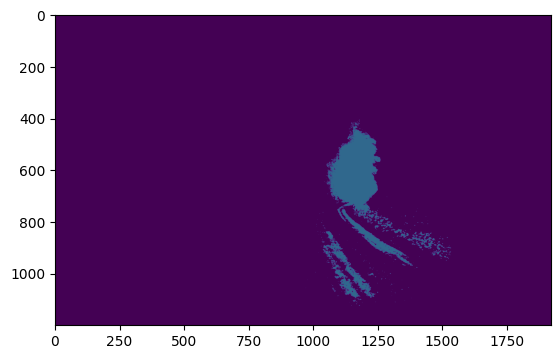

In [ ]:
contrastN = []
homogenN = []
energyN = []
for image in glob.glob(r"/content/drive/MyDrive/ai/fire_detection/non_fire_images/*.png"):
    # perform thresholding
    thresh = threshold(image)

    #perform GLCM
    c = glcm_contrast(thresh)
    h = glcm_homogen(thresh)
    e = glcm_energy(thresh)
    #list array 
    contrastN.append(c)
    homogenN.append(h)
    energyN.append(e)

print ("kontras", contrastN)
print ("homogen", homogenN)
print ("energy", energyN)

In [ ]:
import pickle
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_fire_contrast.pkl","wb") as f:
    pickle.dump(contrastF, f)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_fire_homogen.pkl","wb") as f:
    pickle.dump(homogenF, f)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_fire_energy.pkl","wb") as f:
    pickle.dump(energyF, f)

In [ ]:
import pickle
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_non_fire_contrast.pkl","wb") as g:
    pickle.dump(contrastN, g)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_non_fire_homogen.pkl","wb") as g:
    pickle.dump(homogenN, g)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_non_fire_energy.pkl","wb") as g:
    pickle.dump(energyN, g)

In [ ]:
'''Load Data Pickle'''
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_fire_contrast.pkl", "rb") as f:
    Contrast_Fire1 = pickle.load(f)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_fire_homogen.pkl", "rb") as f:
    Homogen_Fire1 = pickle.load(f)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_fire_energy.pkl", "rb") as f:
    Energy_Fire1 = pickle.load(f)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_non_fire_contrast.pkl", "rb") as g:
    Contrast_NonFire1 = pickle.load(g)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_non_fire_homogen.pkl", "rb") as g:
    Homogen_NonFire1 = pickle.load(g)
with open("/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm/glcm_non_fire_energy.pkl", "rb") as g:
    Energy_NonFire1 = pickle.load(g)

In [ ]:
import pandas as pd

Contrast2 = Contrast_Fire1 + Contrast_NonFire1
Energy2 = Energy_Fire1 + Energy_NonFire1

Homogen2 = Homogen_Fire1 + Homogen_NonFire1
c = np.r_[np.zeros(len(Contrast_Fire1)), np.ones(len(Contrast_NonFire1))]

df = pd.DataFrame({'Contrast': Contrast2, 'Homogen': Homogen2, 'Energy': Energy2, 'Class' : c})
df.to_csv('/content/drive/MyDrive/ai/fire_detection/hasil_general/glcm.csv', encoding = 'utf-8', index = False)

print(df)

       Contrast   Homogen    Energy  Class
0   1733.720987  0.910291  0.846916    0.0
1    519.256901  0.973246  0.958544    0.0
2   1455.910966  0.921222  0.793888    0.0
3    576.884243  0.949281  0.672937    0.0
4    117.001092  0.988177  0.961838    0.0
..          ...       ...       ...    ...
91  1082.103154  0.934969  0.789600    1.0
92   499.125204  0.986553  0.965176    1.0
93  1268.786275  0.980443  0.939491    1.0
94    46.519021  0.998966  0.998204    1.0
95    26.875685  0.995368  0.969445    1.0

[96 rows x 4 columns]


In [ ]:
import pandas as pd

Contrast2 = Contrast_Fire1 + Contrast_NonFire1
Homogen2 = Homogen_Fire1 + Homogen_NonFire1
c = np.r_[np.zeros(len(Contrast_Fire1)), np.ones(len(Contrast_NonFire1))]

df = pd.DataFrame({'Contrast': Contrast2, 'Homogen': Homogen2, 'Class' : c})
df.to_csv('/content/drive/MyDrive/ai/fire_detection/hasil_general/hasil_contrast_homogen.csv', encoding = 'utf-8', index = False)

print(df)

       Contrast   Homogen  Class
0   1733.720987  0.910291    0.0
1    519.256901  0.973246    0.0
2   1455.910966  0.921222    0.0
3    576.884243  0.949281    0.0
4    117.001092  0.988177    0.0
..          ...       ...    ...
91  1082.103154  0.934969    1.0
92   499.125204  0.986553    1.0
93  1268.786275  0.980443    1.0
94    46.519021  0.998966    1.0
95    26.875685  0.995368    1.0

[96 rows x 3 columns]


In [ ]:
import pandas as pd

Contrast2 = Contrast_Fire1 + Contrast_NonFire1
Energy2 = Energy_Fire1 + Energy_NonFire1
c = np.r_[np.zeros(len(Contrast_Fire1)), np.ones(len(Contrast_NonFire1))]

df = pd.DataFrame({'Contrast': Contrast2, 'Energy': Energy2, 'Class' : c})
df.to_csv('/content/drive/MyDrive/ai/fire_detection/hasil_general/hasil_contrastenergy.csv', encoding = 'utf-8', index = False)

print(df)

       Contrast    Energy  Class
0   1733.720987  0.846916    0.0
1    519.256901  0.958544    0.0
2   1455.910966  0.793888    0.0
3    576.884243  0.672937    0.0
4    117.001092  0.961838    0.0
..          ...       ...    ...
91  1082.103154  0.789600    1.0
92   499.125204  0.965176    1.0
93  1268.786275  0.939491    1.0
94    46.519021  0.998204    1.0
95    26.875685  0.969445    1.0

[96 rows x 3 columns]


In [ ]:
import pandas as pd

Homogen2 = Homogen_Fire1 + Homogen_NonFire1
Energy2 = Energy_Fire1 + Energy_NonFire1
c = np.r_[np.zeros(len(Homogen_Fire1)), np.ones(len(Homogen_NonFire1))]

df = pd.DataFrame({'Homogen': Homogen2, 'Energy': Energy2, 'Class' : c})
df.to_csv('/content/drive/MyDrive/ai/fire_detection/hasil_general/hasil_homogenenergy.csv', encoding = 'utf-8', index = False)

print(df)

     Homogen    Energy  Class
0   0.910291  0.846916    0.0
1   0.973246  0.958544    0.0
2   0.921222  0.793888    0.0
3   0.949281  0.672937    0.0
4   0.988177  0.961838    0.0
..       ...       ...    ...
91  0.934969  0.789600    1.0
92  0.986553  0.965176    1.0
93  0.980443  0.939491    1.0
94  0.998966  0.998204    1.0
95  0.995368  0.969445    1.0

[96 rows x 3 columns]


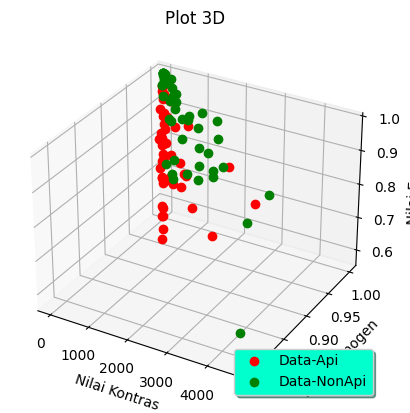

In [ ]:
fig1, ax1 = plt.subplots(subplot_kw={'projection': '3d'})
ax1.plot(contrastF, homogenF, energyF, 'ro', label = 'Data-Api')
ax1.plot(contrastN, homogenN, energyN, 'go', label = 'Data-NonApi')
legend1 = ax1.legend(loc = 'lower right', shadow = True)
legend1.get_frame().set_facecolor('#00FFCC')
#plt.xlabel('Nilai Kontras')
#plt.ylabel('Nilai Homogen')
#ax1.set_zlabel('Nilai Energy')

ax1.set_xlabel('Nilai Kontras')
ax1.set_ylabel('Nilai Homogen')
ax1.set_zlabel('Nilai Energy')
ax1.set_title('Plot 3D')

plt.show()

In [ ]:
# fig1, ax1 = plt.subplots()
# ax1.plot(contrastF, homogenF, 'ro', label = 'Data-Api')
# ax1.plot(contrastN, homogenN,'go', label = 'Data-NonApi')
# legend1 = ax1.legend(loc = 'lower right', shadow = True)
# legend1.get_frame().set_facecolor('#00FFCC')
# plt.xlabel('Nilai Kontras')
# plt.ylabel('Nilai Homogen')
# plt.show()

0.65


<ipython-input-14-5a4d86e99907>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],


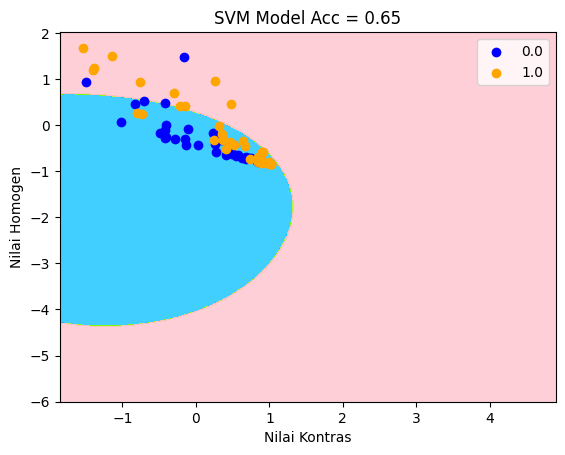

In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/ai/fire_detection/hasil_general/hasil_contrast_homogen.csv')
X = dataset.iloc[:, :2]
y = dataset.Class

for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    classifier = svm.SVC(kernel='rbf', C=1, gamma=0.1)
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))

    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('DeepSkyBlue', 'yellow', 'Chartreuse', 'pink')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],
                    c=ListedColormap(('blue', 'orange', 'green', 'red'))(i), label=j)
    plt.title('SVM Model Acc = ' + str(classifier.score(X_test, y_test)))
    plt.xlabel('Nilai Kontras')
    plt.ylabel('Nilai Homogen')
    plt.legend()
    plt.show()

In [ ]:
# fig1, ax1 = plt.subplots()
# ax1.plot(contrastF, energyF, 'ro', label = 'Data-Api')
# ax1.plot(contrastN, energyN,'go', label = 'Data-NonApi')
# legend1 = ax1.legend(loc = 'lower right', shadow = True)
# legend1.get_frame().set_facecolor('#00FFCC')
# plt.xlabel('Nilai Kontras')
# plt.ylabel('Nilai Energy')
# plt.show()

0.9


<ipython-input-16-d3ce01847fd4>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],


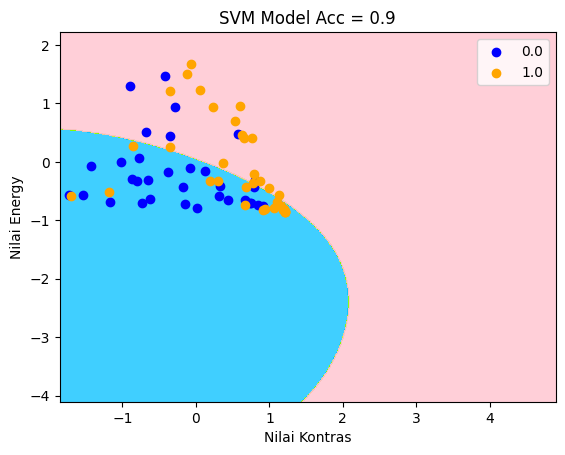

In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/ai/fire_detection/hasil_general/hasil_contrastenergy.csv')
X = dataset.iloc[:, :2]
y = dataset.Class

for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    classifier = svm.SVC(kernel='rbf', C=1, gamma=0.1)
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))

    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('DeepSkyBlue', 'yellow', 'Chartreuse', 'pink')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],
                    c=ListedColormap(('blue', 'orange', 'green', 'red'))(i), label=j)
    plt.title('SVM Model Acc = ' + str(classifier.score(X_test, y_test)))
    plt.xlabel('Nilai Kontras')
    plt.ylabel('Nilai Energy')
    plt.legend()
    plt.show()

In [ ]:
# fig1, ax1 = plt.subplots()
# ax1.plot(homogenF, energyF, 'ro', label = 'Data-Api')
# ax1.plot(homogenN, energyN,'go', label = 'Data-NonApi')
# legend1 = ax1.legend(loc = 'lower right', shadow = True)
# legend1.get_frame().set_facecolor('#00FFCC')
# plt.xlabel('Nilai Homogen')
# plt.ylabel('Nilai Energy')
# plt.show()

0.9


<ipython-input-18-4078b8a6522a>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],


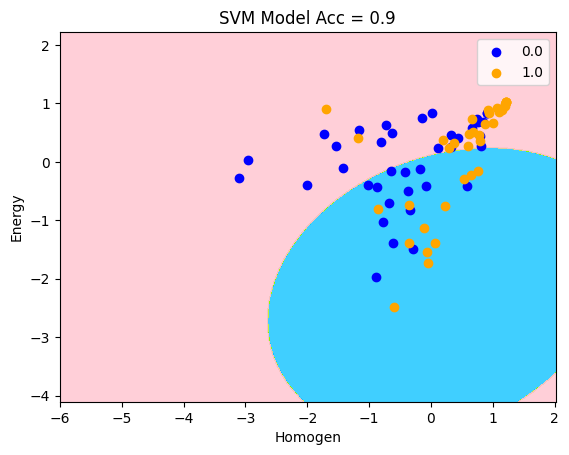

In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/ai/fire_detection/hasil_general/hasil_homogenenergy.csv')
X = dataset.iloc[:, :2]
y = dataset.Class

for i in range(1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    classifier = svm.SVC(kernel='rbf', C=1, gamma=0.1)
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))

    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('DeepSkyBlue', 'yellow', 'Chartreuse', 'pink')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],
                    c=ListedColormap(('blue', 'orange', 'green', 'red'))(i), label=j)
    plt.title('SVM Model Acc = ' + str(classifier.score(X_test, y_test)))
    plt.xlabel('Homogen')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

In [ ]:
# Predict test set
y_pred = classifier.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

